# Importing libraries and data

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import os
import sklearn 
from sklearn.cluster import KMeans # here you import the kmeans algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Set path
path = r'/Users/corinagugulus/Achievement 6/'

In [18]:
# Import the df_profile data

df = pd.read_csv(os.path.join(path, 'Prepared Data','df_profile.csv'), index_col = False, low_memory = False)

#Data Cleaning

In [19]:
df.columns

Index(['ID_Python', 'ID', 'Amenities', 'Bathrooms', 'Bedrooms', 'Currency',
       'Fee', 'Has_Photo', 'Pets_Allowed', 'Price', 'Price_Display',
       'Price_Type', 'Square_Feet', 'Address', 'Cityname', 'State', 'Latitude',
       'Longitude', 'Source', 'Time'],
      dtype='object')

In [20]:
#Dropping ID, Currency, Price_Display, Price_Type, Address, Time columns because they are not needed for analysis
df.drop(['ID_Python','ID','Currency', 'Price_Display', 'Amenities', 'Price_Type', 'Address', 'Time', 'Cityname', 'Latitude', 'Longitude', 'State', 'Source', 'Has_Photo', 'Pets_Allowed'], axis = 1, inplace = True)

In [21]:
df.columns

Index(['Bathrooms', 'Bedrooms', 'Fee', 'Price', 'Square_Feet'], dtype='object')

In [22]:
df.shape

(99117, 5)

In [23]:
df.head()

,Bathrooms,Bedrooms,Fee,Price,Square_Feet
0,2,0,NaN,1,0
1,2,0,NaN,1,0
2,1,0,NaN,1,0
3,1,0,NaN,1,0
4,1,2,NaN,1,0


In [34]:
#Check for missing values
df.isnull().sum() 

Bathrooms          0
Bedrooms           0
Fee            94660
Price              0
Square_Feet        0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99117 entries, 0 to 99116
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bathrooms    99117 non-null  int64 
 1   Bedrooms     99117 non-null  int64 
 2   Fee          4457 non-null   object
 3   Price        99117 non-null  int64 
 4   Square_Feet  99117 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [37]:
df.drop(['Fee'], axis = 1, inplace = True)

# The Elbow Technique

In [38]:
num_cl = range (1, 10) # Defines the range of potential clusters in the data.
Kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [41]:
score = [Kmeans[i].fit(df).score(df) for i in range(len(Kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

[-10558085493.534693,
 -4246464072.6987944,
 -2402605412.123974,
 -1513482335.524647,
 -960595739.7248937,
 -674319445.9232613,
 -480662666.1192028,
 -390594522.6095735,
 -322844671.4773319]

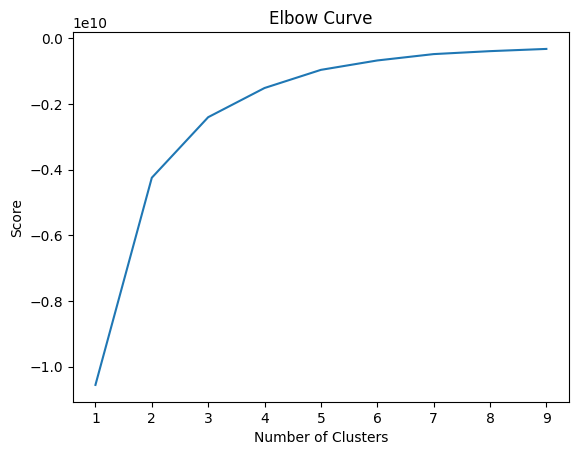

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [43]:
#I choose the optimal count for the clusters three because the curve jumps rapidly from 2 to 3 on the x-axis and then although it still goes up the jump is not abrupt. 

# k-Means Clustering

In [84]:
kmeans = KMeans(n_clusters = 3)

In [85]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [86]:
df['clusters'] = kmeans.fit_predict(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
df.head()

,Bathrooms,Bedrooms,Price,Square_Feet,clusters
0,2,0,1,0,0
1,2,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,2,1,0,0


In [88]:
df['clusters'].value_counts()

clusters
0    96439
1     2539
2      139
Name: count, dtype: int64

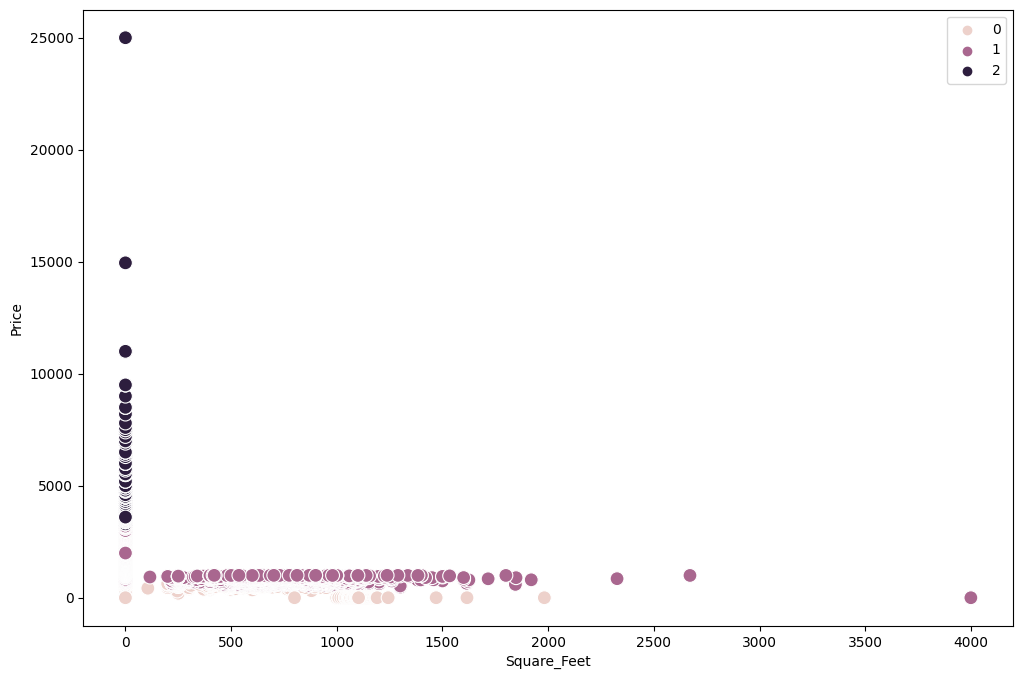

In [89]:
# Plot the clusters for the "Price" and "Square_Feet" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Square_Feet'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square_Feet') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

The cluster two (black dots) shows that the price goes up even though the size of the apartment is not. Cluster one shows that although there are more square footage the price doens't raise. Cluster zero shows the same. All these come to invalidate the hyphotesis that the bigger the size of an apartment or house, the higher the price. More analysis is required to see what influences the raise of the price.  

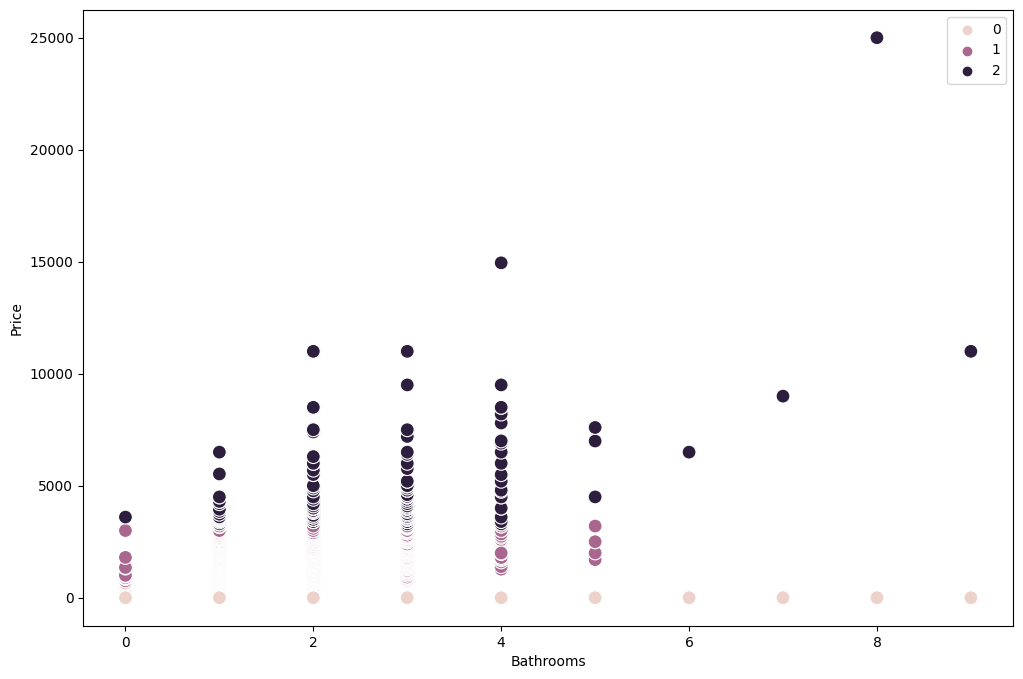

In [90]:
# Plot the clusters for the "Bathrooms" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Bathrooms'], y=df['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bathrooms') 
plt.ylabel('Price') 
plt.show()

The cluster 2 from the above visualization shows that the price goes up if there are more bathrooms so it would be intersting to further analyze to see if there is a direct relationship indeed between these two variables. Although cluster one points that the price goes up for rentals with one to five bathrooms, there are also some dots for rentals with zero bathrooms, which can be assumed that the data is not right since all the rentals would have at least one bathroom. Cluster zero comes to point that even for the rentals with eight bathrooms the price doesn't go up. However, the data points are rare. 

In [91]:
#Creating flags for diffent clusters and creating a column 'cluster'

df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [92]:
#grouping by 'cluster' colors and calculating statistics

df.groupby('cluster').agg({'Square_Feet':['mean', 'median'], 
                         'Bathrooms':['mean', 'median'], 
                         'Bedrooms':['mean', 'median'],
                          'Price':['mean', 'median']})

Square_Feet        Bathrooms         Bedrooms               Price   
               mean median      mean median      mean median         mean   
cluster                                                                     
black      0.000000    0.0  2.705036    3.0  3.021583    3.0  5123.107914  \
pink       1.478593    0.0  0.036593    0.0  0.038957    0.0     0.653512   
purple   281.095313    0.0  1.416306    1.0  1.631745    1.0  1329.458448   

                 
         median  
cluster          
black    4300.0  
pink        0.0  
purple   1152.0

#The black cluster contains the column Square_Feet with its zero mean and median. We could guess that there is an issue with the dataframe because most of these fields were filled in with zero. However, the stats for the other variables look fine. Further, we can state that there is a relationship between price and bathrooms and bedrooms variables that require further analysis. This is confirmed by the pink and purple clusters, as well.   